# Лабораторная работа №4 по теме "Байесовские сети"

```
Студент: Таланкин Кирилл
Группа: М8О-309Б-23
Датасет: Mushroom Classification
```

### 0. Установка зависимостей

In [3]:
!pip install pgmpy networkx matplotlib pandas kagglehub


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


### 1. Загружаем датасет (локальный файл)

In [9]:
import pandas as pd

# Загрузка датасета
data = pd.read_csv('mushrooms.csv')

Посмотрим на его структуру

In [10]:
data.head(3)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m


In [11]:
data.shape

(8124, 23)

### 2. Обработка датасета

можно закодировать метки с помощью Label Encoding

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in data.columns:
    data[col] = le.fit_transform(data[col])

data.head(3)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3


можно сохранить как категориальный, но удаляем дубликаты

In [13]:
data = data.drop_duplicates()
print(data.shape)

(8124, 23)


### 3. Построение Байесовсой сети

Данный метод представляет собой конструктивное построение структуры дискретной байесовской сети путем явного задания направленных ребер между узлами. В этом подходе структура сети создается декларативно - мы напрямую указываем список кортежей (родительский узел, дочерний узел), что определяет направленные зависимости между переменными.

In [14]:
from pgmpy.models import DiscreteBayesianNetwork

# Задаем направление между вершинами
network = [
     ('cap-shape', 'class'),
     ('cap-surface', 'class'),
     ('cap-color', 'class'),
     ('bruises', 'class'),
     ('odor', 'class'),
     ('gill-attachment', 'class'),
     ('gill-spacing', 'class'),
     ('gill-size', 'class'),
     ('gill-color', 'class'),
     ('stalk-shape', 'class'),
     ('stalk-root', 'class'),
     ('stalk-surface-above-ring', 'class'),
     ('stalk-surface-below-ring', 'class'),
     ('stalk-color-above-ring', 'class'),
     ('stalk-color-below-ring', 'class'),
     ('veil-type', 'class'),
     ('veil-color', 'class'),
     ('ring-number', 'class'),
     ('ring-type', 'class'),
     ('spore-print-color', 'class'),
     ('population', 'class'),
     ('habitat', 'class')
]

# Строим Дискретную Байесовскую сеть
model = DiscreteBayesianNetwork(network)
model.edges()  # Просмотр ребер

OutEdgeView([('cap-shape', 'class'), ('cap-surface', 'class'), ('cap-color', 'class'), ('bruises', 'class'), ('odor', 'class'), ('gill-attachment', 'class'), ('gill-spacing', 'class'), ('gill-size', 'class'), ('gill-color', 'class'), ('stalk-shape', 'class'), ('stalk-root', 'class'), ('stalk-surface-above-ring', 'class'), ('stalk-surface-below-ring', 'class'), ('stalk-color-above-ring', 'class'), ('stalk-color-below-ring', 'class'), ('veil-type', 'class'), ('veil-color', 'class'), ('ring-number', 'class'), ('ring-type', 'class'), ('spore-print-color', 'class'), ('population', 'class'), ('habitat', 'class')])

Этот код использует метод поиска с подъемом на холм (Hill Climb Search) для оценки структуры Байесовской сети из данных, используя Байесовский информационный критерий (BIC) в качестве функции оценки.

BIC (Bayesian Information Criterion) — это функция оценки, используемая для сравнения статистических моделей (в данном случае, структур Байесовских сетей).

Цель: Он наказывает модели за излишнюю сложность (большое количество параметров/ребер), одновременно вознаграждая за хорошее соответствие данным.

Принцип: Модели с меньшим значением BIC считаются лучшими.

Формула (концептуально): BIC≈L−k⋅ln(N), где L — логарифмическое правдоподобие модели (насколько хорошо модель объясняет данные), k — количество параметров модели (сложность), а N — количество точек данных.

❗️**ЕСЛИ будете строить сеть автоматически, посмотрите на методы и разберитесь с ними☺️**❗️

In [15]:
from pgmpy.estimators import HillClimbSearch, BIC

hc = HillClimbSearch(data)
best_model = hc.estimate(scoring_method=BIC(data))
model = DiscreteBayesianNetwork(best_model.edges())
model.edges()  # Автоматическая структура

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'class': 'N', 'cap-shape': 'N', 'cap-surface': 'N', 'cap-color': 'N', 'bruises': 'N', 'odor': 'N', 'gill-attachment': 'N', 'gill-spacing': 'N', 'gill-size': 'N', 'gill-color': 'N', 'stalk-shape': 'N', 'stalk-root': 'N', 'stalk-surface-above-ring': 'N', 'stalk-surface-below-ring': 'N', 'stalk-color-above-ring': 'N', 'stalk-color-below-ring': 'N', 'veil-type': 'N', 'veil-color': 'N', 'ring-number': 'N', 'ring-type': 'N', 'spore-print-color': 'N', 'population': 'N', 'habitat': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'class': 'N', 'cap-shape': 'N', 'cap-surface': 'N', 'cap-color': 'N', 'bruises': 'N', 'odor': 'N', 'gill-attachment': 'N', 'gill-spacing': 'N', 'gill-size': 'N', 'gill-color': 'N', 'stalk-shape': 'N', 'stalk-root': 'N', 'stalk-surface-above-ring': 'N', 'stalk-surface-below-ring': 'N', 'stalk-color-above

OutEdgeView([('class', 'habitat'), ('class', 'stalk-surface-above-ring'), ('class', 'population'), ('class', 'bruises'), ('class', 'stalk-surface-below-ring'), ('habitat', 'stalk-color-below-ring'), ('habitat', 'ring-number'), ('population', 'gill-spacing'), ('population', 'cap-surface'), ('bruises', 'habitat'), ('bruises', 'cap-color'), ('bruises', 'cap-shape'), ('odor', 'class'), ('odor', 'cap-color'), ('odor', 'gill-spacing'), ('gill-spacing', 'ring-type'), ('gill-spacing', 'stalk-surface-above-ring'), ('gill-spacing', 'habitat'), ('ring-type', 'stalk-color-below-ring'), ('ring-type', 'stalk-surface-below-ring'), ('ring-type', 'bruises'), ('ring-type', 'stalk-surface-above-ring'), ('gill-size', 'population'), ('gill-size', 'cap-shape'), ('gill-size', 'odor'), ('gill-size', 'stalk-color-above-ring'), ('stalk-color-above-ring', 'gill-attachment'), ('stalk-color-above-ring', 'veil-color'), ('gill-color', 'gill-size'), ('gill-color', 'stalk-shape'), ('stalk-shape', 'odor'), ('stalk-shap

### 3. Получение вероятностей

Мы хотим получить вероятностные оценки переходов из одного состояние в другое. Для этого необходимо Байесовскую сеть подогнать по данные и получить таблички (CPT).

Conditional Probability Table (CPT) [Таблица Условных Вероятностей (CPT)] — это ключевой элемент, определяющий параметры Байесовской сети.

* Что это: Это таблица, которая содержит вероятность каждого возможного состояния узла (переменной) при условии всех возможных комбинаций состояний его родительских узлов (тех, от которых к нему идут стрелки/ребра).
* Роль: CPTs количественно определяют зависимости и силу связей между переменными, позволяя сети выполнять логический вывод и прогнозирование.
* Простой пример: В CPT для узла "Кашель", родительским узлом которого является "Грипп", будет указана вероятность кашля, если грипп есть (например, 90%), и вероятность кашля, если гриппа нет (например, 5%).

Чтобы получить значения вероятности переходов из разных узлов, нужно оценить эти вероятности. `HillClimbSearch` ищет только структуру, а `MaximumLikelihoodEstimator` и `BayesianEstimator` позволяют оценить вероятность.

In [16]:
# Метод Максимального Правдоподобия
from pgmpy.estimators import MaximumLikelihoodEstimator

model.fit(data, estimator=MaximumLikelihoodEstimator)

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'class': 'N', 'cap-shape': 'N', 'cap-surface': 'N', 'cap-color': 'N', 'bruises': 'N', 'odor': 'N', 'gill-attachment': 'N', 'gill-spacing': 'N', 'gill-size': 'N', 'gill-color': 'N', 'stalk-shape': 'N', 'stalk-root': 'N', 'stalk-surface-above-ring': 'N', 'stalk-surface-below-ring': 'N', 'stalk-color-above-ring': 'N', 'stalk-color-below-ring': 'N', 'veil-type': 'N', 'veil-color': 'N', 'ring-number': 'N', 'ring-type': 'N', 'spore-print-color': 'N', 'population': 'N', 'habitat': 'N'}


Вместо того чтобы просто считать частоты (как MLE), Байесовский оценщик вычисляет апостериорное распределение вероятностей (CPT)

In [17]:
# Байесовский оценщик
from pgmpy.estimators import BayesianEstimator

model.fit(data, estimator=BayesianEstimator, prior_type='BDeu', equivalent_sample_size=10)

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'class': 'N', 'cap-shape': 'N', 'cap-surface': 'N', 'cap-color': 'N', 'bruises': 'N', 'odor': 'N', 'gill-attachment': 'N', 'gill-spacing': 'N', 'gill-size': 'N', 'gill-color': 'N', 'stalk-shape': 'N', 'stalk-root': 'N', 'stalk-surface-above-ring': 'N', 'stalk-surface-below-ring': 'N', 'stalk-color-above-ring': 'N', 'stalk-color-below-ring': 'N', 'veil-type': 'N', 'veil-color': 'N', 'ring-number': 'N', 'ring-type': 'N', 'spore-print-color': 'N', 'population': 'N', 'habitat': 'N'}


Просмотр полной таблички

In [18]:
cpt_class = model.get_cpds('class')
print(cpt_class)

+-------------+-----+-----------------------+
| odor        | ... | odor(8)               |
+-------------+-----+-----------------------+
| stalk-shape | ... | stalk-shape(1)        |
+-------------+-----+-----------------------+
| class(0)    | ... | 0.0004817883985353632 |
+-------------+-----+-----------------------+
| class(1)    | ... | 0.9995182116014646    |
+-------------+-----+-----------------------+


Просмотр таблиц для конкретных узлов

In [20]:
for node in ['odor', 'bruises', 'veil-color']:
    cpt = model.get_cpds(node)
    print(f"CPT for {node}:\n{cpt}")

CPT for odor:
+-------------------+-----+----------------------+
| gill-size         | ... | gill-size(1)         |
+-------------------+-----+----------------------+
| spore-print-color | ... | spore-print-color(8) |
+-------------------+-----+----------------------+
| stalk-shape       | ... | stalk-shape(1)       |
+-------------------+-----+----------------------+
| odor(0)           | ... | 0.1111111111111111   |
+-------------------+-----+----------------------+
| odor(1)           | ... | 0.1111111111111111   |
+-------------------+-----+----------------------+
| odor(2)           | ... | 0.1111111111111111   |
+-------------------+-----+----------------------+
| odor(3)           | ... | 0.1111111111111111   |
+-------------------+-----+----------------------+
| odor(4)           | ... | 0.1111111111111111   |
+-------------------+-----+----------------------+
| odor(5)           | ... | 0.1111111111111111   |
+-------------------+-----+----------------------+
| odor(6)        

### 4. Визуализация сети через библиотеку `networkx`

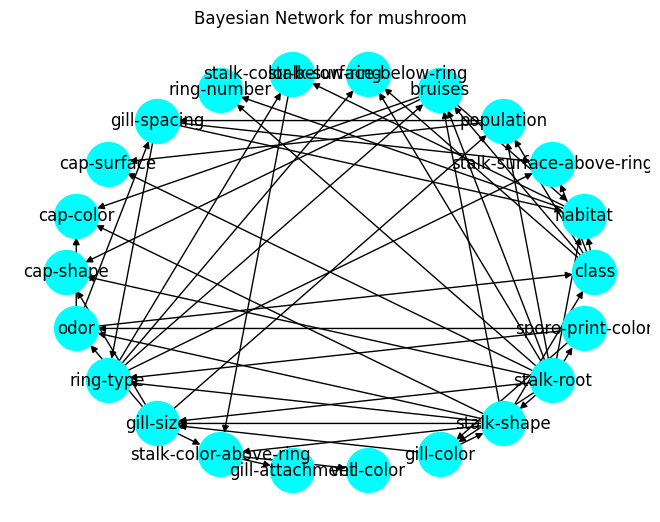

In [35]:
import networkx as nx
import matplotlib.pyplot as plt

nx_graph = nx.DiGraph(model.edges())
pos = nx.circular_layout(nx_graph)
nx.draw(nx_graph, pos, with_labels=True, node_size=1000, node_color='cyan', arrows=True)
plt.title("Bayesian Network for mushroom")
plt.show()

In [26]:
data['odor'].value_counts()

odor
5    3528
2    2160
7     576
8     576
0     400
3     400
6     256
1     192
4      36
Name: count, dtype: int64

### 5. Посмотрим пример инференса

In [36]:
from pgmpy.inference import VariableElimination

infer = VariableElimination(model)
query = infer.query(variables=['class'], evidence={'odor': 2})
print(query)  # Вероятности классов

+----------+--------------+
| class    |   phi(class) |
+==========+==============+
| class(0) |       0.0003 |
+----------+--------------+
| class(1) |       0.9997 |
+----------+--------------+


### 6. Сравнение результатов с baseline-моделью (например, наивный байесовский классификатор из scikit-learn) по метрикам accuracy или log-likelihood.

In [37]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, log_loss

def extract_probs(query_result):
    if isinstance(query_result, dict):
        factor = next(iter(query_result.values()))
    else:
        factor = query_result

    probs = np.asarray(getattr(factor, "values"))
    state_names = getattr(factor, "state_names", None)
    if isinstance(state_names, dict) and 'class' in state_names:
        state_order = state_names['class']
    else:
        state_order = [str(i) for i in range(probs.shape[0])]

    return probs, state_order

def reorder_probs(probs, state_order, target_labels):
    mapping = {str(lbl): idx for idx, lbl in enumerate(target_labels)}
    aligned = np.zeros_like(probs, dtype=float)
    for i, s in enumerate(state_order):
        key = str(s)
        if key not in mapping:
            raise ValueError(f"{s} not found in {target_labels}")
        aligned[mapping[key]] = float(probs[i])
    return aligned

def bn_predict(model, inferencer, X_df, class_order):
    preds, probs = [], []
    model_nodes = set(model.nodes())

    for _, row in X_df.iterrows():
        evidence = {k: int(v) for k, v in row.items() if k in model_nodes}
        q = inferencer.query(variables=['class'], evidence=evidence)

        raw_probs, state_order = extract_probs(q)
        aligned = reorder_probs(raw_probs, state_order, class_order)

        probs.append(aligned)
        preds.append(class_order[np.argmax(aligned)])

    return np.array(preds), np.vstack(probs)


X = data.drop(columns=['class']).astype(int)
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

class_labels = np.unique(y_train)

y_pred_bn, y_prob_bn = bn_predict(model, infer, X_test, class_labels)

acc_bn = accuracy_score(y_test, y_pred_bn)
ll_bn = log_loss(y_test, y_prob_bn, labels=class_labels)

print(f"Bayesian Network — accuracy: {acc_bn}")
print(f"Bayesian Network — log-loss: {ll_bn}")

nb = CategoricalNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)
y_prob_nb = nb.predict_proba(X_test)

acc_nb = accuracy_score(y_test, y_pred_nb)
ll_nb = log_loss(y_test, y_prob_nb, labels=nb.classes_)

print(f"CategoricalNB — accuracy: {acc_nb}")
print(f"CategoricalNB — log-loss: {ll_nb}")

Bayesian Network — accuracy: 1.0
Bayesian Network — log-loss: 0.00036036407835434483
CategoricalNB — accuracy: 0.9527326440177253
CategoricalNB — log-loss: 0.1305532135783994
